**<font size=5>利用手写数字识别初识深度学习的keras库</font>**

我们此处要解决的问题是将手写数字的灰度图像（28像素*28像素）分类为10类（0至9）。我们将使用的数据集是MNIST数据集，这是机器学习社区中的经典数据集，它存在的时间与字段本身差不多，并且已经进行了深入研究。它是由国家标准技术研究所（MNIST的NIST）在1980年代组装而成的，包含60,000张训练图像和10,000张测试图像。您可以将“解决”MNIST视为深度学习的“ Hello World”，这是您验证算法是否按预期工作的方法。

工作流程如下：<br>
首先，我们将向我们的神经网络展示训练数据，train_images和train_labels。然后，网络将学会关联图像和标签。最后，我们将要求网络为test_images生成预测，并验证这些预测是否与test_labels中的标签匹配

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


**<font size=4>1. 加载数据</font>**

keras的mnist数据集中包含了70000条数据记录，每条记录表示28*28像素的数字灰度图像，其中60000条作为训练集，10000条作为测试集

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

MNIST数据集以一组四个Numpy数组的形式预加载到Keras中：

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0].shape

(28, 28)

可以用ndim属性查看Numpy张量的轴的个数

In [6]:
train_images.ndim

3

In [7]:
train_labels[0]

5

In [8]:
import matplotlib as mpl

In [9]:
import matplotlib.pyplot as plt

In [10]:
some_digit = train_images[0]

<function matplotlib.pyplot.show(*args, **kw)>

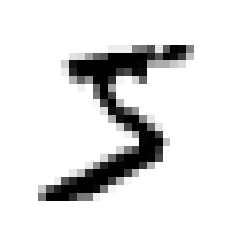

In [11]:
plt.imshow(some_digit, cmap="binary")
plt.axis("off")
plt.show

这个图像看起来很像5，但是究竟是不是呢？

In [12]:
train_labels[0]

5

查看前10个数据的label

In [13]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**<font size=4>2. 神经网络的构建</font>**

神经网络的核心构建模块是“层”，这是一个数据处理模块，您可以将其视为数据的“过滤器”。一些数据输入，并且以更有用的形式输出。准确地说，层从输入数据中提取表示-希望这些表示对当前的问题更有意义。大多数深度学习实际上都是由将简单的层链接在一起构成的，这些简单的层将实现渐进的“数据蒸馏”形式。深度学习模型就像数据处理的筛子一样，由一系列不断完善的数据过滤器（即“层”）组成。

在这里，我们的网络由两个密集层组成，这两个层是紧密连接（也称为“完全连接”）的神经层。第二（也是最后一个）层是10路“softmax”层，这意味着它将返回10个概率值（总和为1）组成的数组。每个分数将是当前数字图像属于10个数类别之一的概率。

In [14]:
from keras import models

In [15]:
from keras import layers

In [16]:
network = models.Sequential()
network.add(layers.Dense(512, activation="relu"))
network.add(layers.Dense(10, activation="softmax"))

对于第二层是一个10路softmax层，他将返回一个由10个概率组成的，每个概率值表示当前数字图像属于10个数字类别中某一个的概率

训练网络，我们还需要编译步骤的三个参数：<br>
**损失函数**：网络如何衡量在训练数据集上的性能，网络朝着正确的方向前进<br>
**优化器**：基于训练数据和损失函数来更新网络的机制<br>
**在训练和测试过程中需要监控的指标**：精度accuracy<br>

In [17]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
train_images.dtype

dtype('uint8')

In [19]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

在训练之前，我们将通过将数据重塑为网络期望的形状并对其进行缩放以使其所有值都在[0,1]区间内来预处理数据。以前，例如，我们的训练图像存储在uint8类型的形状（60000、28、28）形状的数组中，其值在[0，255]区间内。我们将其转换为形状为（60000，28 * 28）的float32数组，其值介于0和1之间

In [20]:
train_images = train_images.reshape((60000,28*28))

In [21]:
test_images = test_images.reshape((10000,28*28))

In [22]:
train_images = train_images.astype("float32")/255

In [23]:
test_images = test_images.astype("float32")/255

对标签进行分类编码

In [24]:
from keras.utils import to_categorical

将类别向量转换为二进制（只有0和1）的矩阵类型表示。其表现为将原有的类别向量转换为one-hot编码的形式

In [25]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [26]:
train_labels[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**<font size=4>3. 将训练数据送入神经网络</font>**

epochs是迭代次数，batch_size是批量大小

In [27]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.2563 - accuracy: 0.9253
Epoch 2/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1056 - accuracy: 0.9683
Epoch 3/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.0687 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.0508 - accuracy: 0.9847
Epoch 5/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.0382 - accuracy: 0.9886


**<font size=4>4. 网络对test_images生成预测</font>**

In [28]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 19us/step


In [29]:
test_loss, test_acc

(0.06625515825826442, 0.9805999994277954)

我们的测试集准确性为98％低于训练集准确性98.9%。训练准确性和测试准确性之间的差距是“过拟合”的一个示例，该事实是机器学习模型在新数据上的表现往往要比其训练数据差。